In [1]:
### Data Analysis and Manipulation 
import pandas as pd
import numpy as np
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## this is for styling
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
mall = pd.read_csv("data/segmentation_data.csv")
mall.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
num_columns = ['Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

mall[cat_columns] = mall[cat_columns].astype('str')

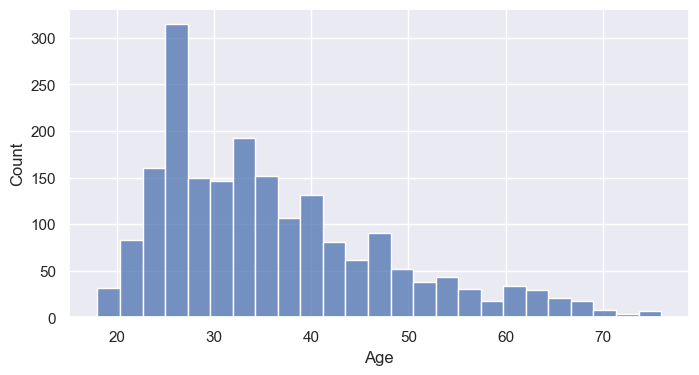

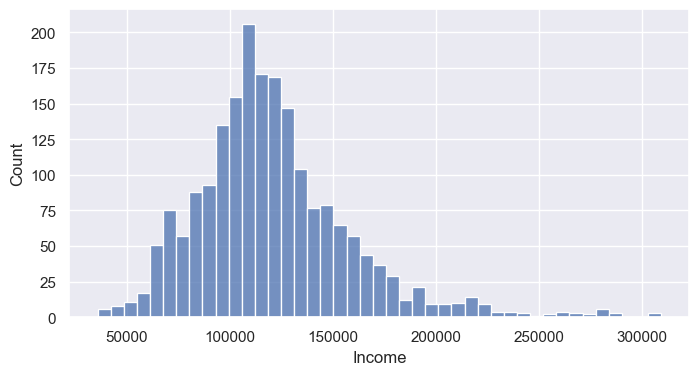

In [4]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=mall, x=numerical)
    plt.show()

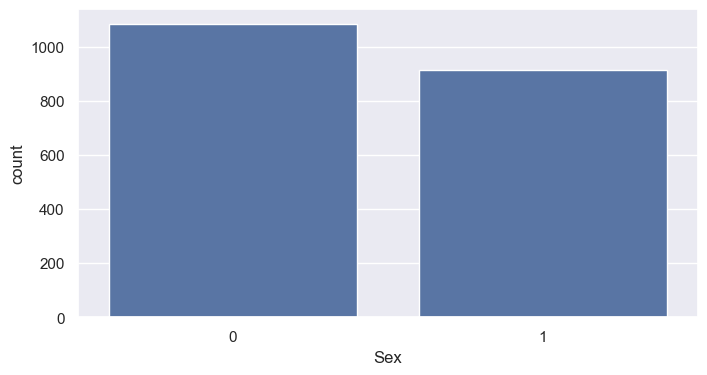

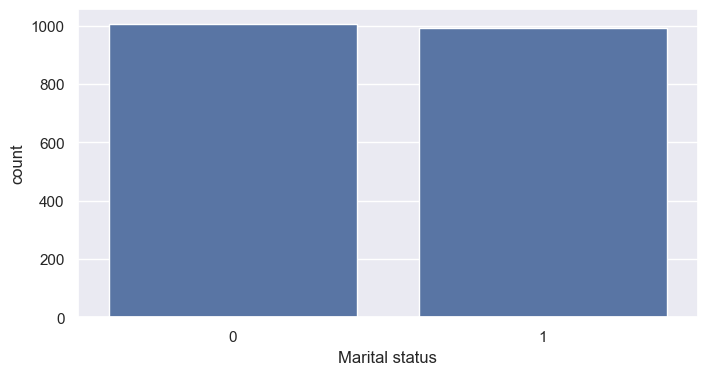

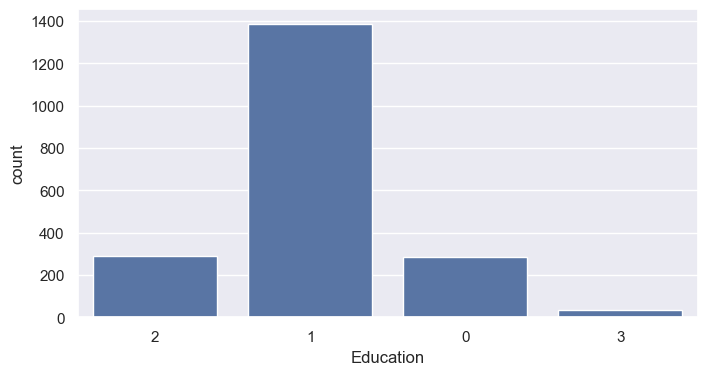

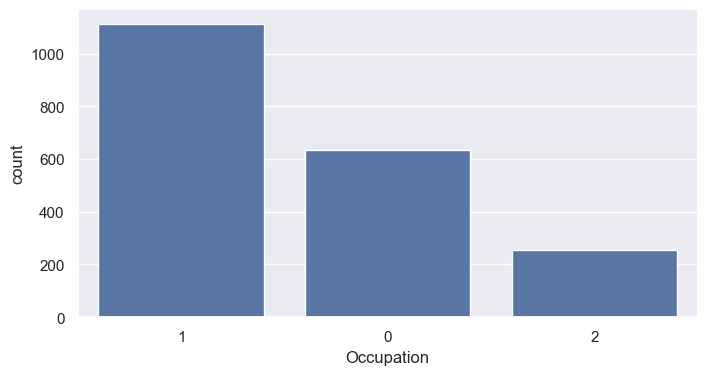

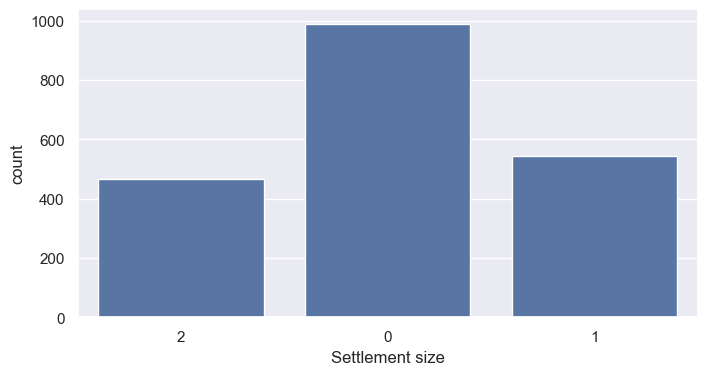

In [5]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=mall, x=category)

------------BẮT ĐẦU QUÁ TRÌNH TIỀN XỬ LÝ DỮ LIỆU------------

In [4]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [5]:
mall.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
mall.duplicated().sum()

0

In [4]:
mall = mall.drop(columns=['ID'])

In [5]:
mall.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


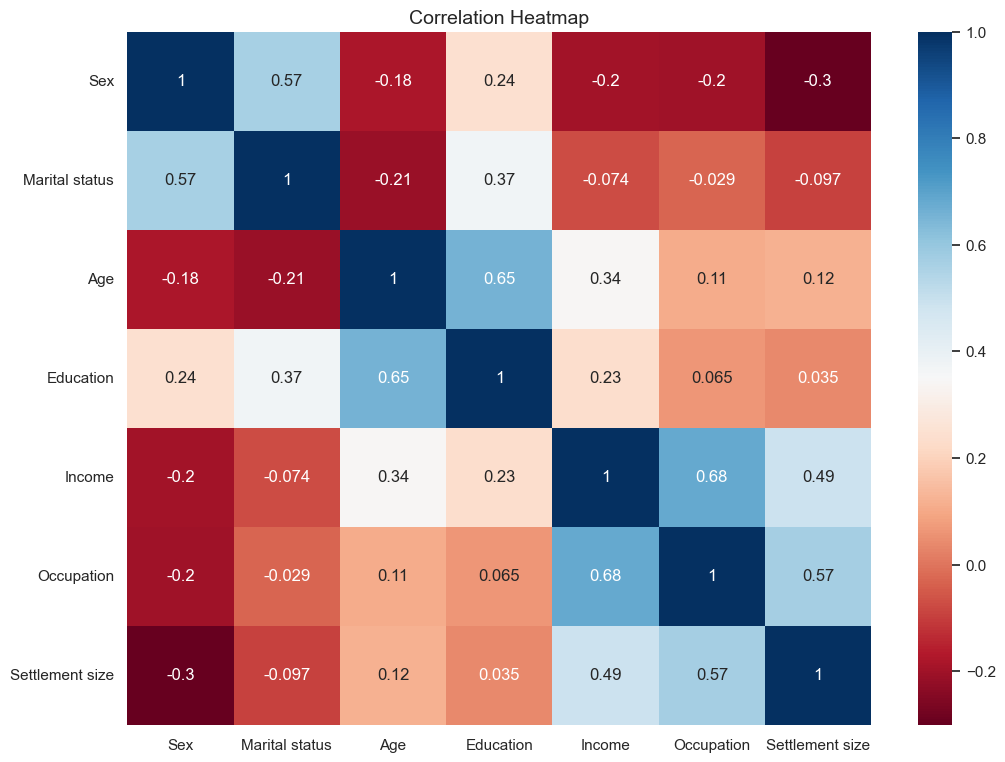

In [5]:
plt.figure(figsize=(12,9))
sns.heatmap(mall.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [6]:
normaltest_result_income = stats.normaltest(mall['Income'])[1]
normaltest_result_age    = stats.normaltest(mall['Age'])[1]

print(f'The p-value for the null hypothesis of the Income being Normally distributed is {normaltest_result_income}')
print(f'The p-value for the null hypothesis of the Age    being Normally distributed is {normaltest_result_age}')

The p-value for the null hypothesis of the Income being Normally distributed is 2.5009638879187734e-98
The p-value for the null hypothesis of the Age    being Normally distributed is 3.3428344869999675e-56


In [7]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

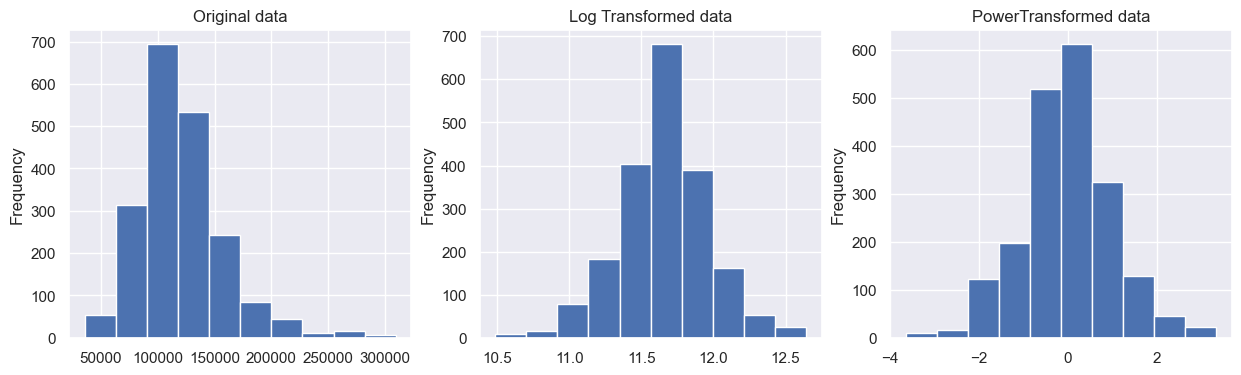

In [8]:
# PowerTransform data
feature = mall['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(mall['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

# Plot original data & get metrics
mall['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(mall['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2)
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3)
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [15]:
normality_test(log_transformed_income)

NormaltestResult(statistic=32.357037046565075, pvalue=9.41366371618838e-08)

In [16]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


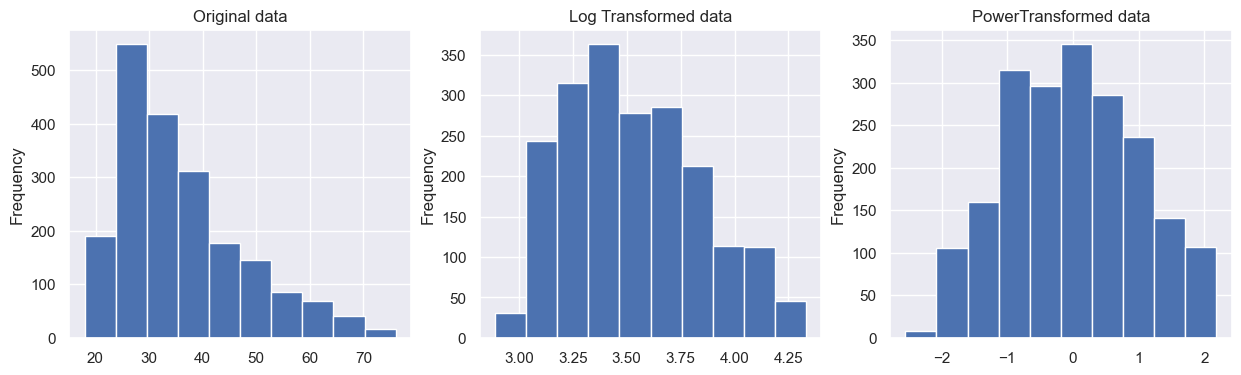

In [9]:
# PowerTransform data
feature2 = mall['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(mall['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

# Plot original data & get metrics
mall['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(mall['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2)
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3)
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [17]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


In [10]:
mall['transf_income'] = feature
mall['transf_age']    = log_transformed_age

In [11]:
mall_transformed = mall.drop(['Income', 'Age'], axis=1)
mall_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


- TIỀN XỬ LÝ DỮ LIỆU

Feature Scaling

In [12]:
scaler = MinMaxScaler()
mall_norm = scaler.fit_transform(mall_transformed)

In [13]:
mall_norm = pd.DataFrame(data = mall_norm,columns = mall_transformed.columns)

In [12]:
mall_norm.head()

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0.0,0.0,0.666667,0.5,1.0,0.556511,0.912494
1,1.0,1.0,0.333333,0.5,1.0,0.646532,0.139320
2,0.0,0.0,0.333333,0.0,0.0,0.401437,0.695276
3,0.0,0.0,0.333333,0.5,0.5,0.708521,0.636153
4,0.0,0.0,0.333333,0.5,0.5,0.640988,0.749756


- XÂY DỰNG MÔ HÌNH PHÂN NHÓM DỮ LIỆU

Tính toán số cụm cần phân

In [14]:
wcss=[]

for c in range(2, 11):
    kmeans=KMeans(n_clusters=c, random_state=0).fit(mall_norm)
    wcss.append(kmeans.inertia_)

d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

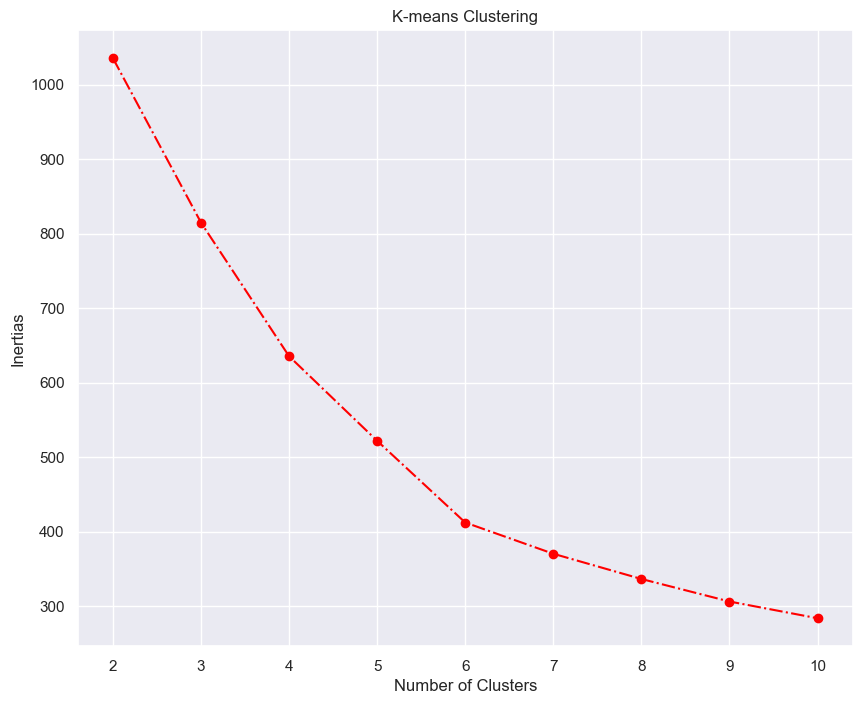

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11),wcss, marker='o',linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('K-means Clustering')
plt.show()

- Tạo mô hình K-means Clustering

In [16]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

Huấn luyện mô hình với bộ dữ liệu sẵn có

In [17]:
kmeans.fit(mall_norm)

d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [18]:
mall_segm_kmeans= mall_norm.copy()
mall_segm_kmeans['SegmentKmeans'] = kmeans.labels_

In [18]:
mall_segm_kmeans.head()

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age,SegmentKmeans
0,0.0,0.0,0.666667,0.5,1.0,0.556511,0.912494,0
1,1.0,1.0,0.333333,0.5,1.0,0.646532,0.139320,4
2,0.0,0.0,0.333333,0.0,0.0,0.401437,0.695276,3
3,0.0,0.0,0.333333,0.5,0.5,0.708521,0.636153,0
4,0.0,0.0,0.333333,0.5,0.5,0.640988,0.749756,0


In [19]:
mall_analysis = mall_segm_kmeans.groupby(['SegmentKmeans']).mean()
mall_analysis

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
SegmentKmeans,,,,,,,
0,0.0,0.0,0.274017,0.633462,0.764990,0.615822,0.524984
1,1.0,1.0,0.403876,0.213953,0.005814,0.448891,0.375836
2,0.0,1.0,0.422827,0.466926,0.459144,0.530253,0.409658
3,0.0,0.0,0.245726,0.182692,0.030449,0.451144,0.484804
4,1.0,1.0,0.444444,0.591503,0.676471,0.585119,0.405291
5,1.0,0.0,0.310861,0.185393,0.036517,0.433188,0.439125


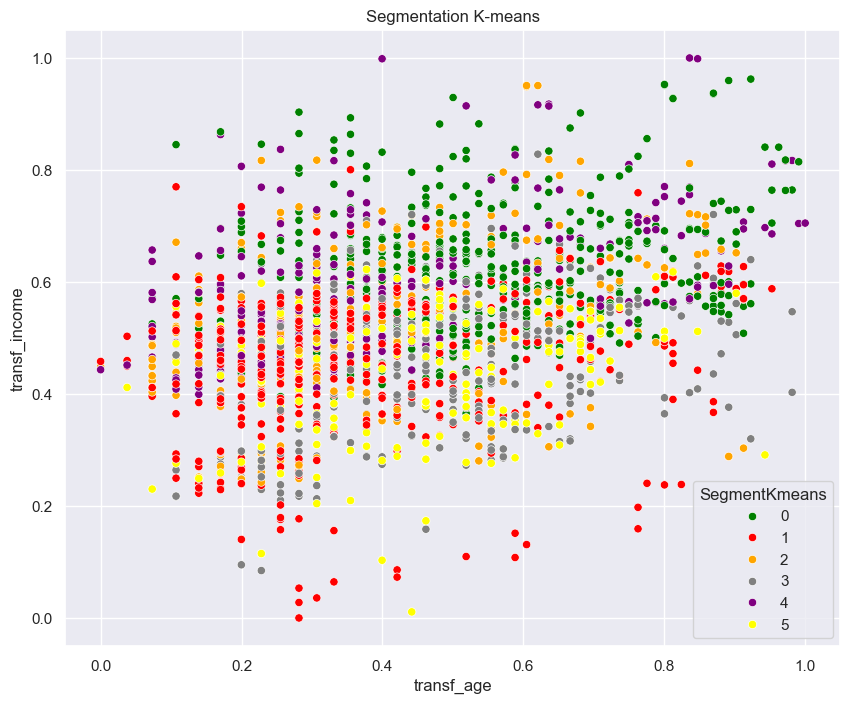

In [20]:
x_axis = mall_norm['transf_age']
y_axis = mall_norm['transf_income']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=mall_analysis, x=x_axis, y=y_axis, 
                hue=mall_segm_kmeans['SegmentKmeans'], 
                palette=['green', 'red', 'orange', 'gray', 'purple', 'yellow'])
plt.title('Segmentation K-means')
plt.show()

PCA with Kmeans for better visualization

In [21]:
mall_kmeans = mall_segm_kmeans.drop(columns=['SegmentKmeans'])

In [22]:
pca = PCA()
pca.fit(mall_kmeans)

PCA()

In [25]:
pca.explained_variance_ratio_

array([0.48160548, 0.24758371, 0.1115914 , 0.07928537, 0.06222289,
       0.00940041, 0.00831074])

Text(0, 0.5, 'Cumulative Explained Variance')

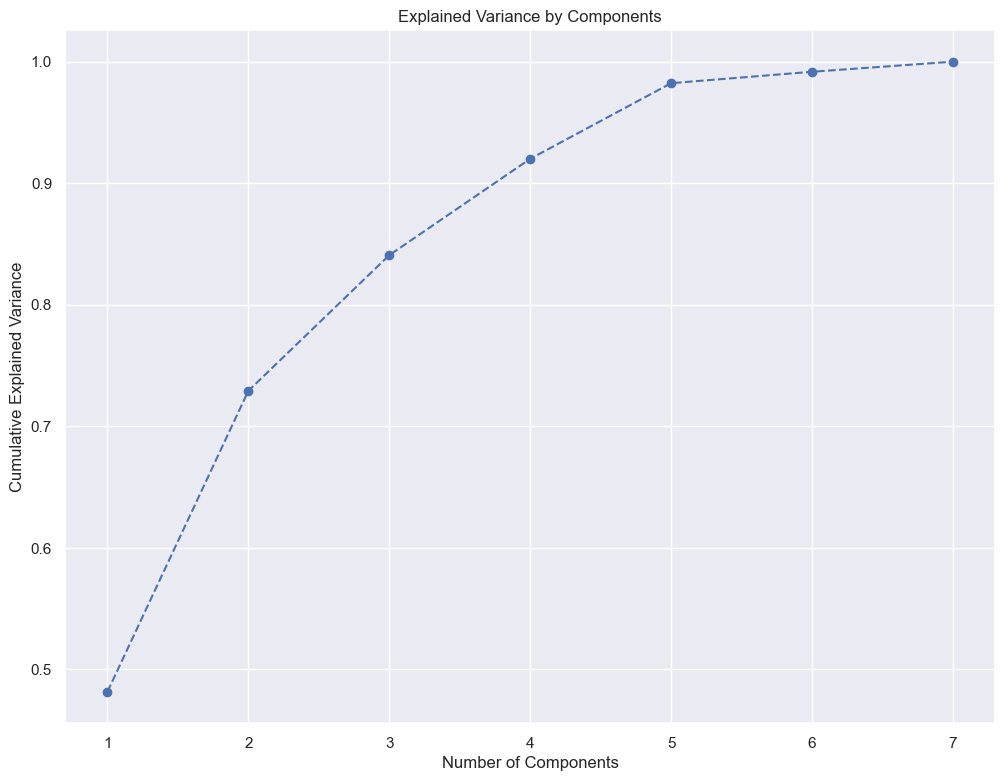

In [23]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [24]:
pca = PCA(n_components = 3)
pca.fit(mall_kmeans)
pca.components_

array([[-0.68533977, -0.64403448, -0.09657044,  0.14907335,  0.26765415,
         0.06498828,  0.09010022],
       [-0.0084169 ,  0.42726743,  0.12499428,  0.50858595,  0.71229275,
         0.18623897,  0.03228853],
       [-0.72532486,  0.61365759,  0.02347423, -0.18645022, -0.22344794,
        -0.07944289, -0.07598239]])

In [25]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = mall_kmeans.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
Component 1,-0.685340,-0.644034,-0.096570,0.149073,0.267654,0.064988,0.090100
Component 2,-0.008417,0.427267,0.124994,0.508586,0.712293,0.186239,0.032289
Component 3,-0.725325,0.613658,0.023474,-0.186450,-0.223448,-0.079443,-0.075982


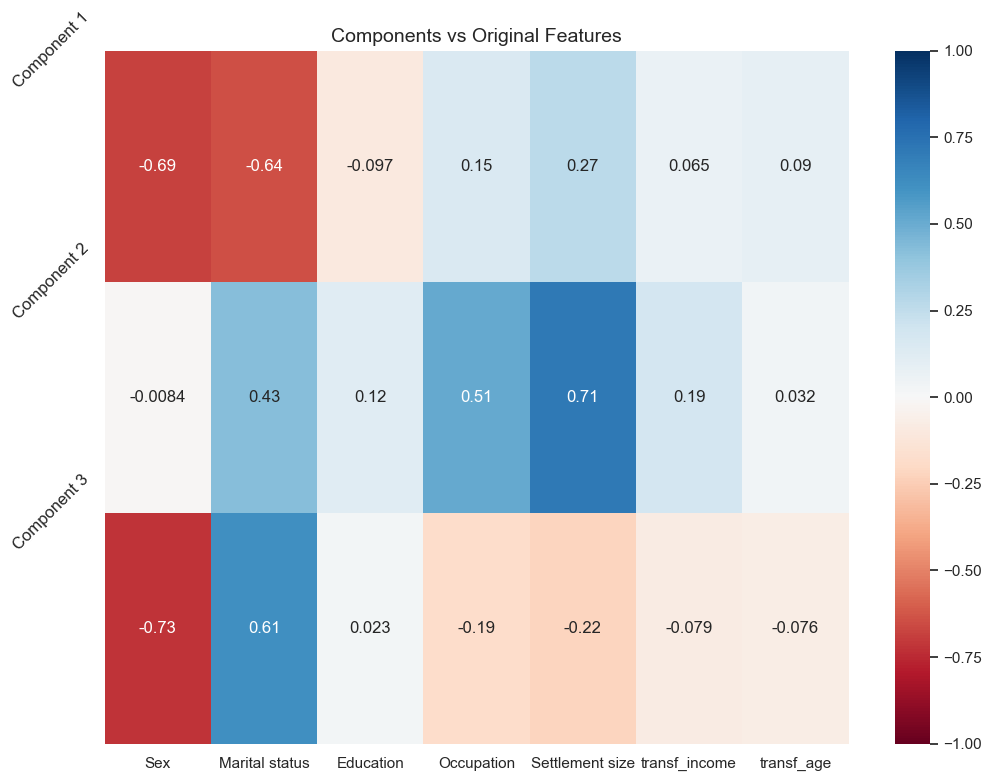

In [26]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [27]:
scores_pca = pca.transform(mall_kmeans)
scores_pca[0]

array([ 0.82914316,  0.35051761, -0.1624032 ])

In [28]:
wcss = []
for i in range(2,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

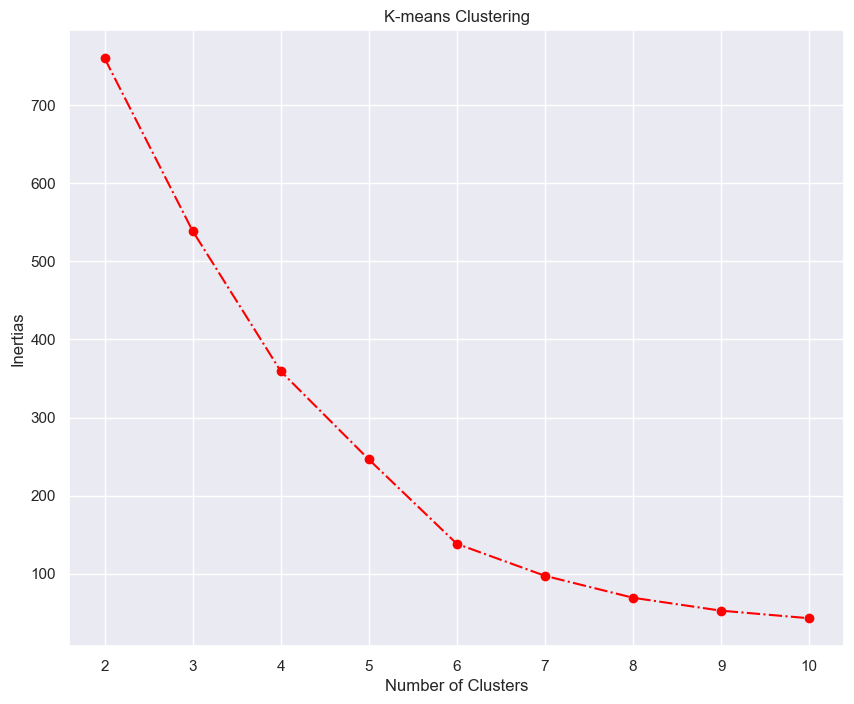

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), wcss, marker='o',linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('K-means Clustering')
plt.show()

In [30]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

d:\University\HocKi7\DataMining\btl\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [31]:
results_df = pd.DataFrame(scores_pca, columns=['Component 1', 'Component 2', 'Component 3'])
results_df['Labels'] = kmeans_pca.labels_
results_df.head()

,Component 1,Component 2,Component 3,Labels
0,0.829143,0.350518,-0.162403,0
1,-0.531854,0.719504,-0.230299,1
2,0.489493,-0.693627,0.175269,5
3,0.712487,-0.027906,-0.049583,0
4,0.718334,-0.036815,-0.052850,0


In [32]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = results_df.groupby(['Labels']).mean()
df_segm_pca_kmeans_freq

,Component 1,Component 2,Component 3
Labels,,,
0,0.792395,0.199109,-0.118860
1,-0.595564,0.546632,-0.187790
2,0.011952,0.324112,0.612843
3,-0.177281,-0.586911,-0.576369
4,-0.838940,-0.154481,0.044569
5,0.516834,-0.590345,0.145421


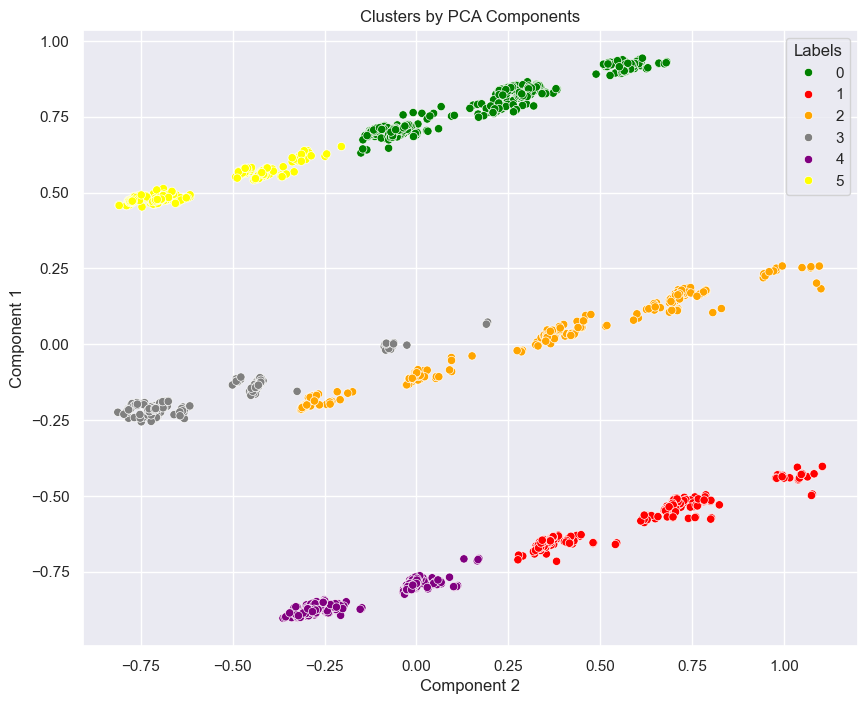

In [33]:
x_axis = results_df['Component 2']
y_axis = results_df['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=results_df, x=x_axis, y=y_axis,
                 hue = results_df['Labels'],
                 palette = ['green', 'red', 'orange', 'gray', 'purple', 'yellow'])
plt.title('Clusters by PCA Components')
plt.show()

In [34]:
results_info = mall.drop(['transf_income', 'transf_age'], axis=1)
results_info['Labels'] = kmeans.labels_
results_info = results_info.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


In [42]:
summary = {}

for index in range(6):
    summary[index] = results_info[results_info['Labels'] == index].describe().T  # .describe method provides general statistics about the data

In [43]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,517.0,40.001934,11.945532,20.0,31.0,37.0,47.0,75.0
Education,517.0,0.822050,0.612576,0.0,0.0,1.0,1.0,2.0
Income,517.0,145373.611219,38286.684815,82398.0,119276.0,136323.0,159757.0,287247.0
Occupation,517.0,1.266925,0.484577,0.0,1.0,1.0,2.0,2.0
Settlement size,517.0,1.529981,0.507283,0.0,1.0,2.0,2.0,2.0
Labels,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

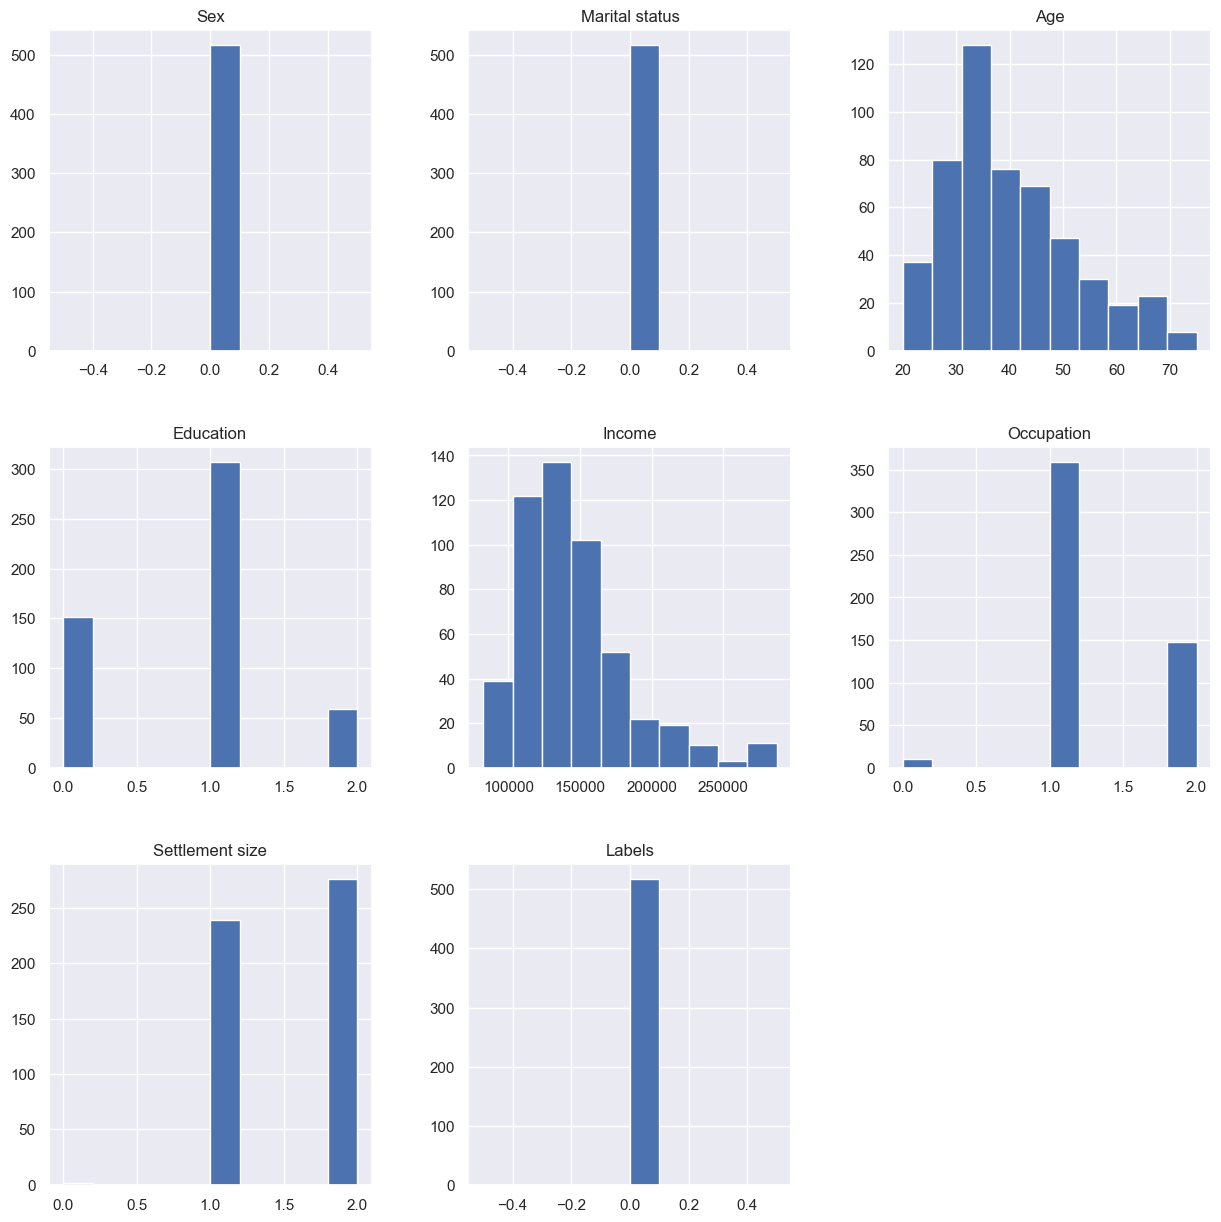

In [40]:
results_info[results_info['Labels'] == 0].hist(figsize=(15,15))

In [44]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,430.0,32.416279,10.911221,18.0,25.00,28.5,36.00,71.0
Education,430.0,1.211628,0.467453,1.0,1.00,1.0,1.00,3.0
Income,430.0,102142.332558,25801.373992,35832.0,86281.25,102323.5,120459.25,207262.0
Occupation,430.0,0.427907,0.495352,0.0,0.00,0.0,1.00,1.0
Settlement size,430.0,0.011628,0.107329,0.0,0.00,0.0,0.00,1.0
Labels,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

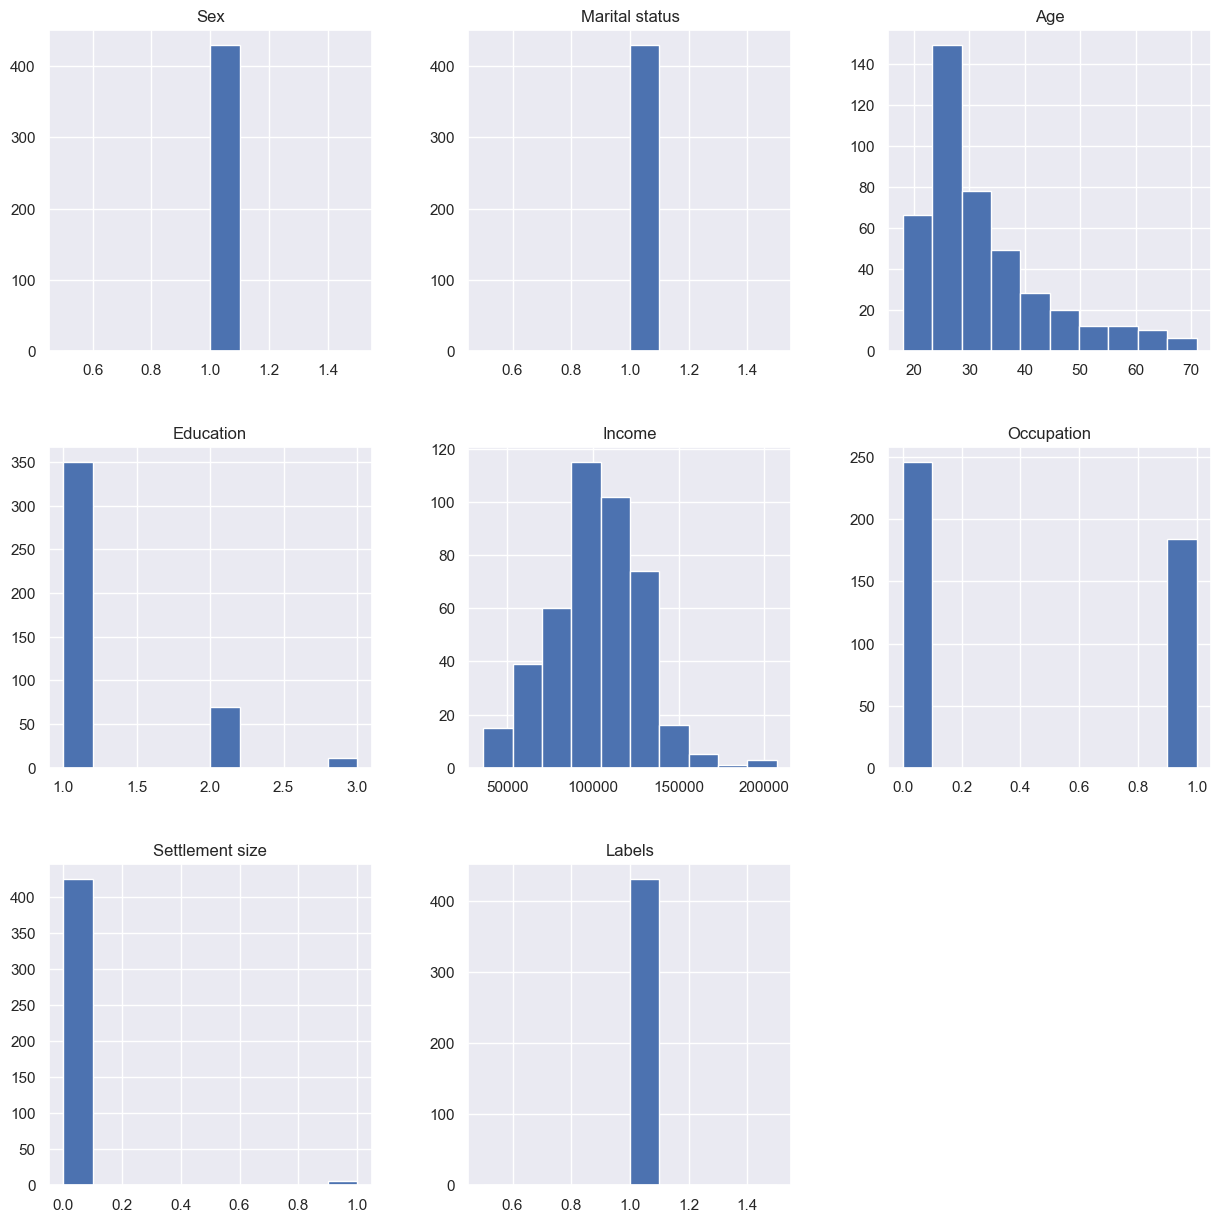

In [45]:
results_info[results_info['Labels'] == 1].hist(figsize=(15,15))

In [46]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,257.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,257.0,33.968872,10.759035,18.0,26.0,31.0,40.0,67.0
Education,257.0,1.268482,0.501851,1.0,1.0,1.0,1.0,3.0
Income,257.0,122976.723735,38529.241076,62263.0,96769.0,115369.0,146519.0,280570.0
Occupation,257.0,0.933852,0.630834,0.0,1.0,1.0,1.0,2.0
Settlement size,257.0,0.918288,0.827468,0.0,0.0,1.0,2.0,2.0
Labels,257.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

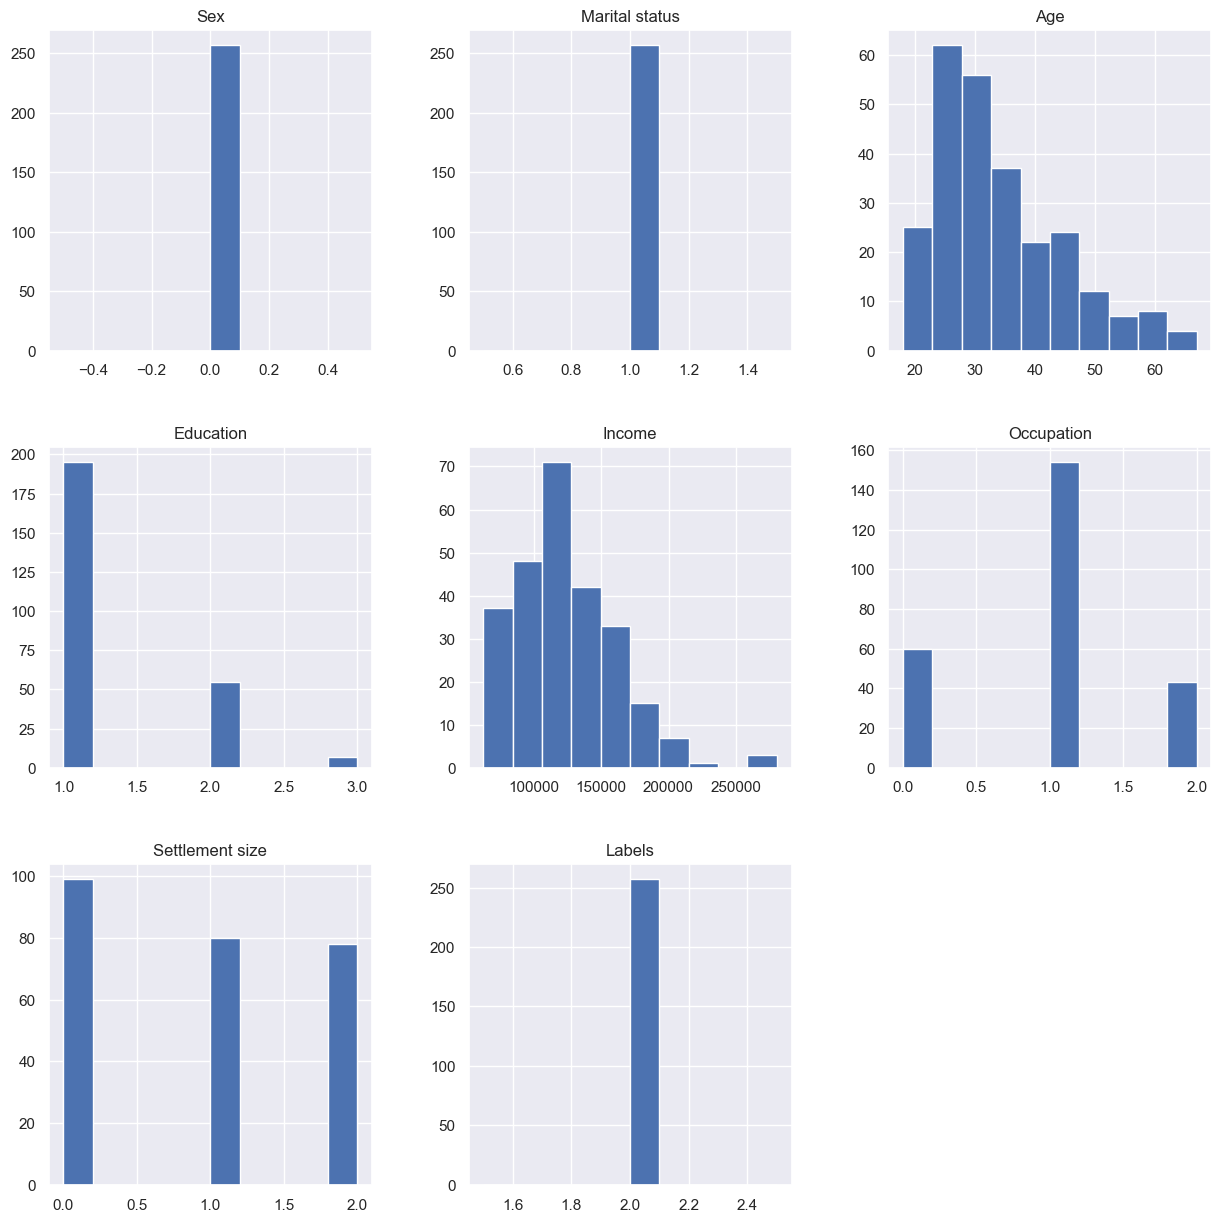

In [47]:
results_info[results_info['Labels'] == 2].hist(figsize=(15,15))

In [48]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,312.0,37.567308,10.633108,21.0,29.75,36.0,42.00,74.0
Education,312.0,0.737179,0.579524,0.0,0.00,1.0,1.00,2.0
Income,312.0,102566.410256,26584.893960,43684.0,81804.00,103618.5,120396.75,219319.0
Occupation,312.0,0.365385,0.501913,0.0,0.00,0.0,1.00,2.0
Settlement size,312.0,0.060897,0.239526,0.0,0.00,0.0,0.00,1.0
Labels,312.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

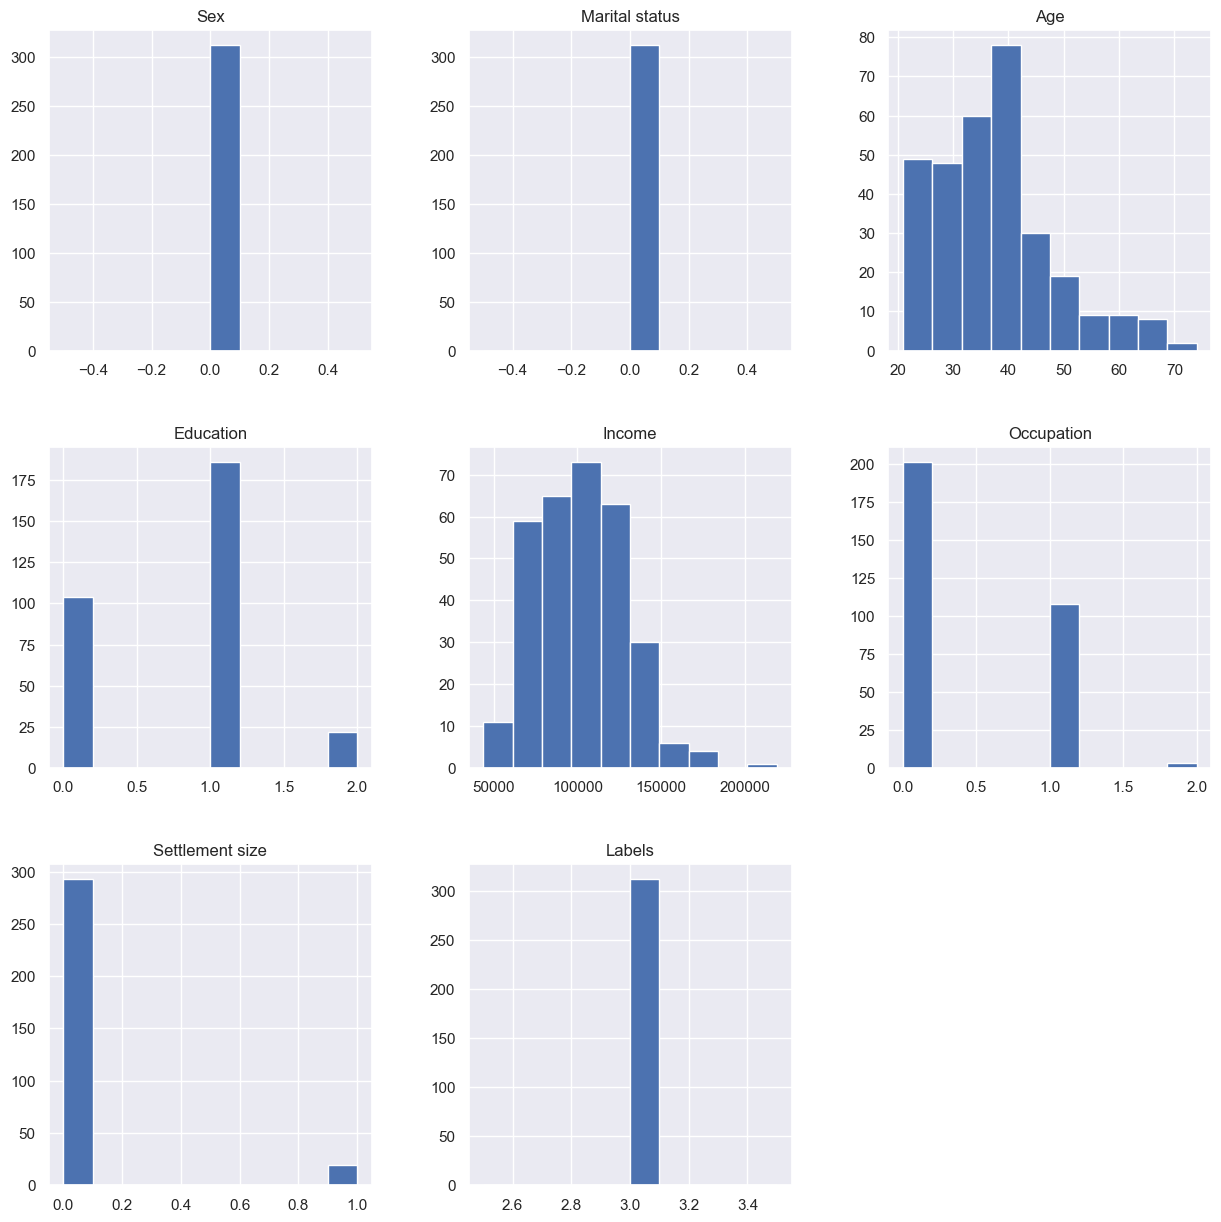

In [49]:
results_info[results_info['Labels'] == 3].hist(figsize=(15,15))

In [50]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,306.0,34.284314,13.001925,18.0,25.0,29.0,40.0,76.0
Education,306.0,1.333333,0.572598,1.0,1.0,1.0,2.0,3.0
Income,306.0,136536.702614,38103.456491,88800.0,108455.0,126778.5,155107.0,309364.0
Occupation,306.0,1.183007,0.403881,0.0,1.0,1.0,1.0,2.0
Settlement size,306.0,1.352941,0.511771,0.0,1.0,1.0,2.0,2.0
Labels,306.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

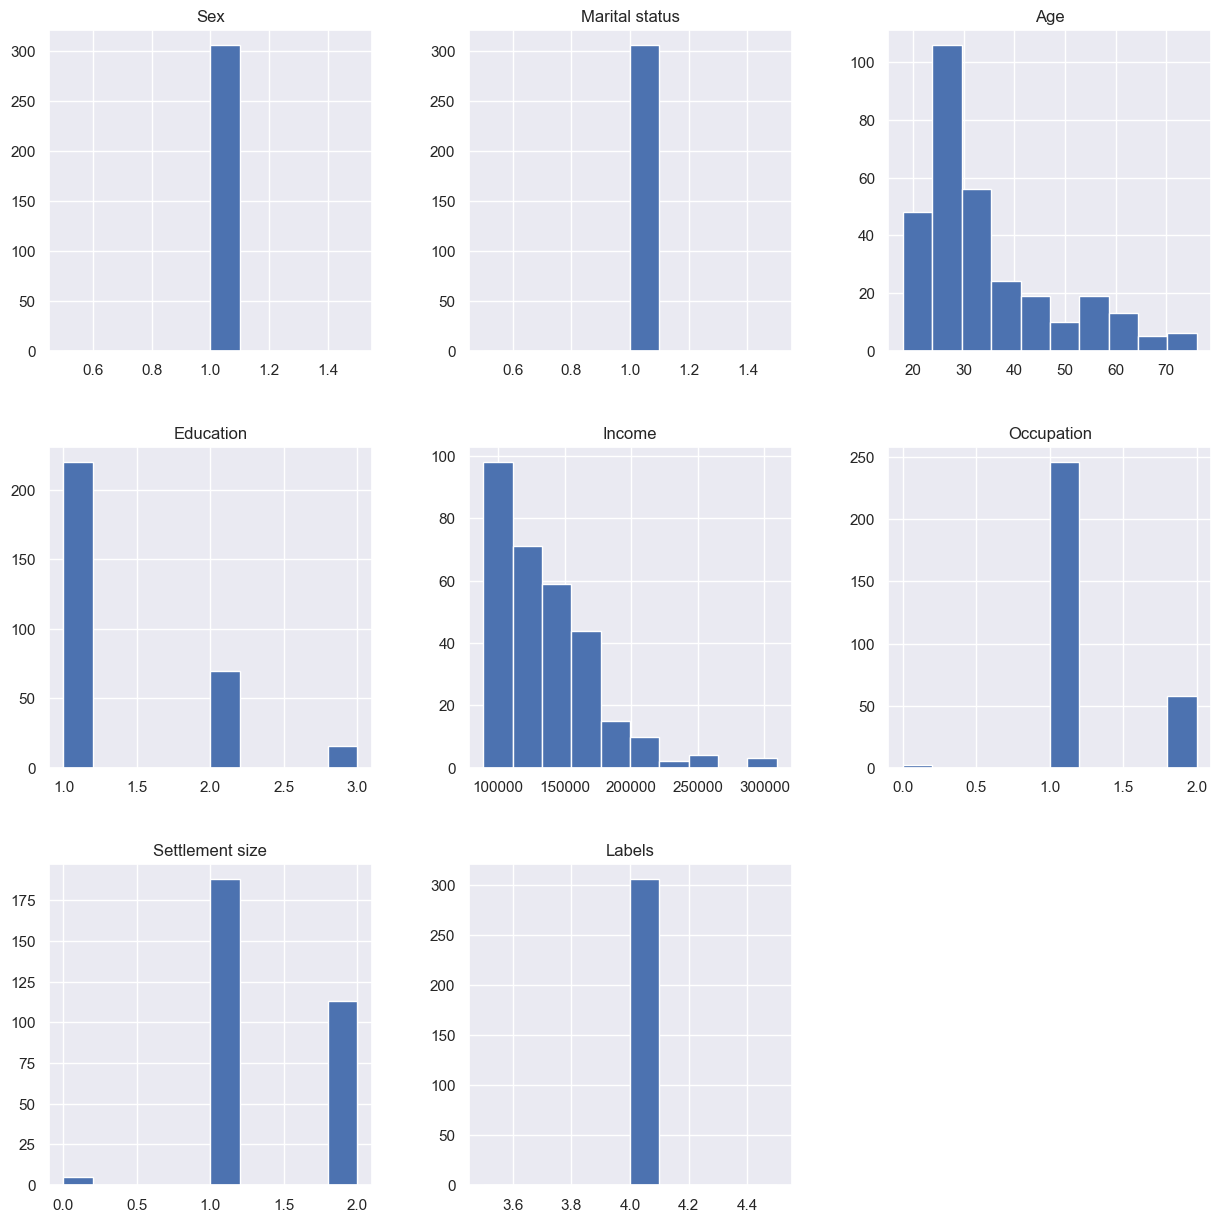

In [52]:
results_info[results_info['Labels'] == 4].hist(figsize=(15,15))

In [53]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Sex,178.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,178.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,178.0,35.146067,9.755833,19.0,27.0,34.5,41.0,70.0
Education,178.0,0.932584,0.558403,0.0,1.0,1.0,1.0,3.0
Income,178.0,97997.241573,21702.050536,36760.0,80892.5,101511.0,113265.0,143321.0
Occupation,178.0,0.370787,0.507169,0.0,0.0,0.0,1.0,2.0
Settlement size,178.0,0.073034,0.260926,0.0,0.0,0.0,0.0,1.0
Labels,178.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

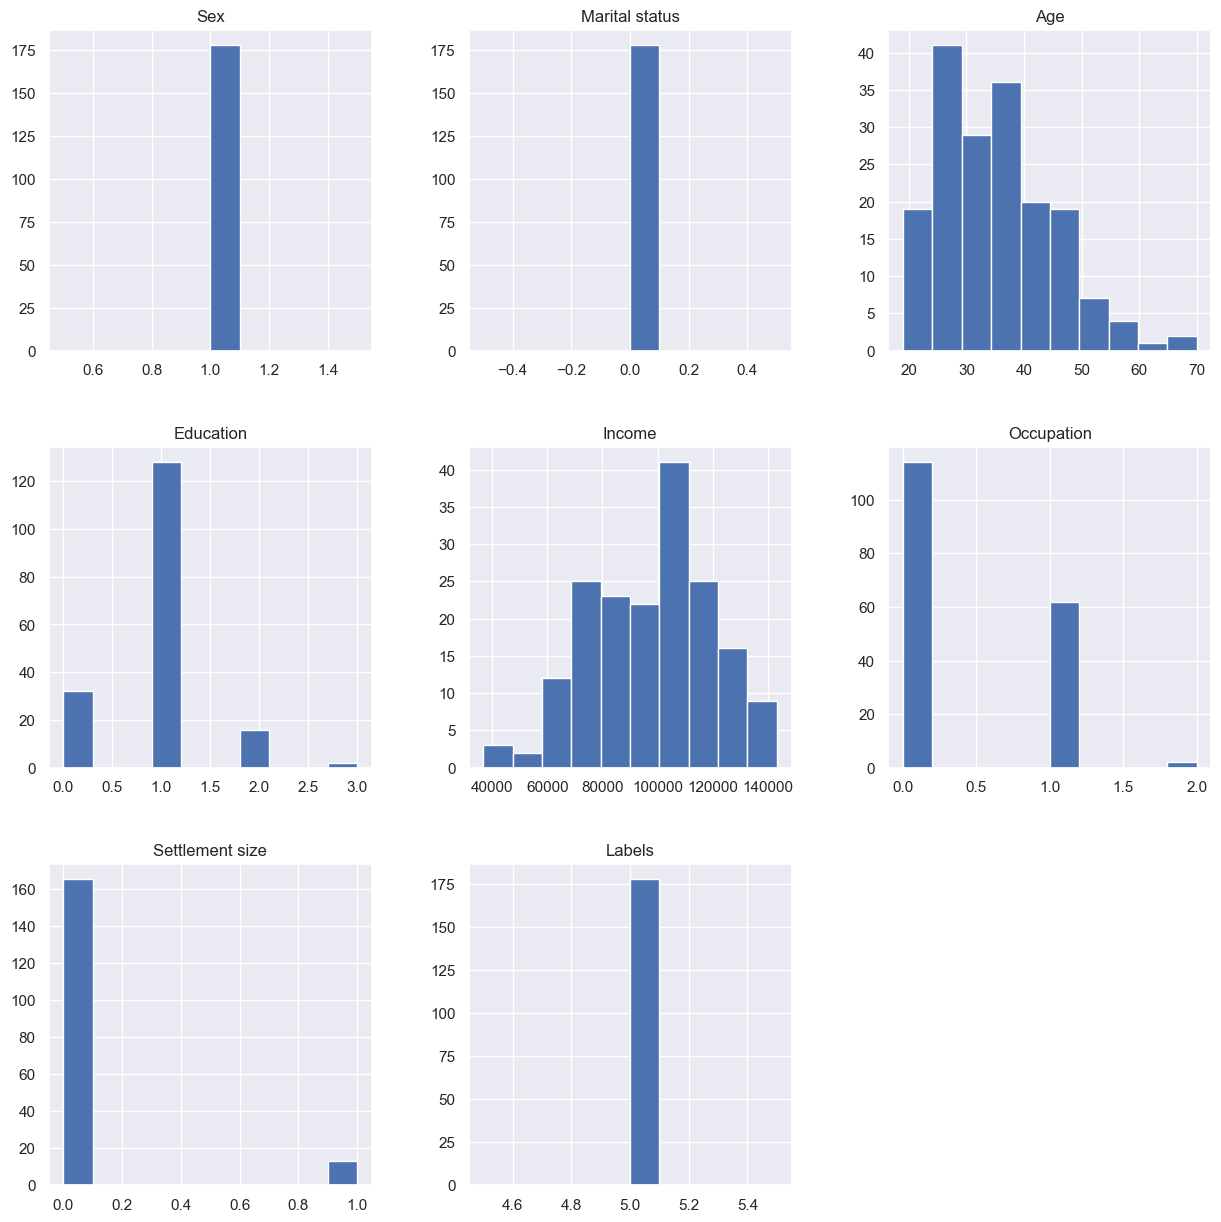

In [54]:
results_info[results_info['Labels'] == 5].hist(figsize=(15,15))

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

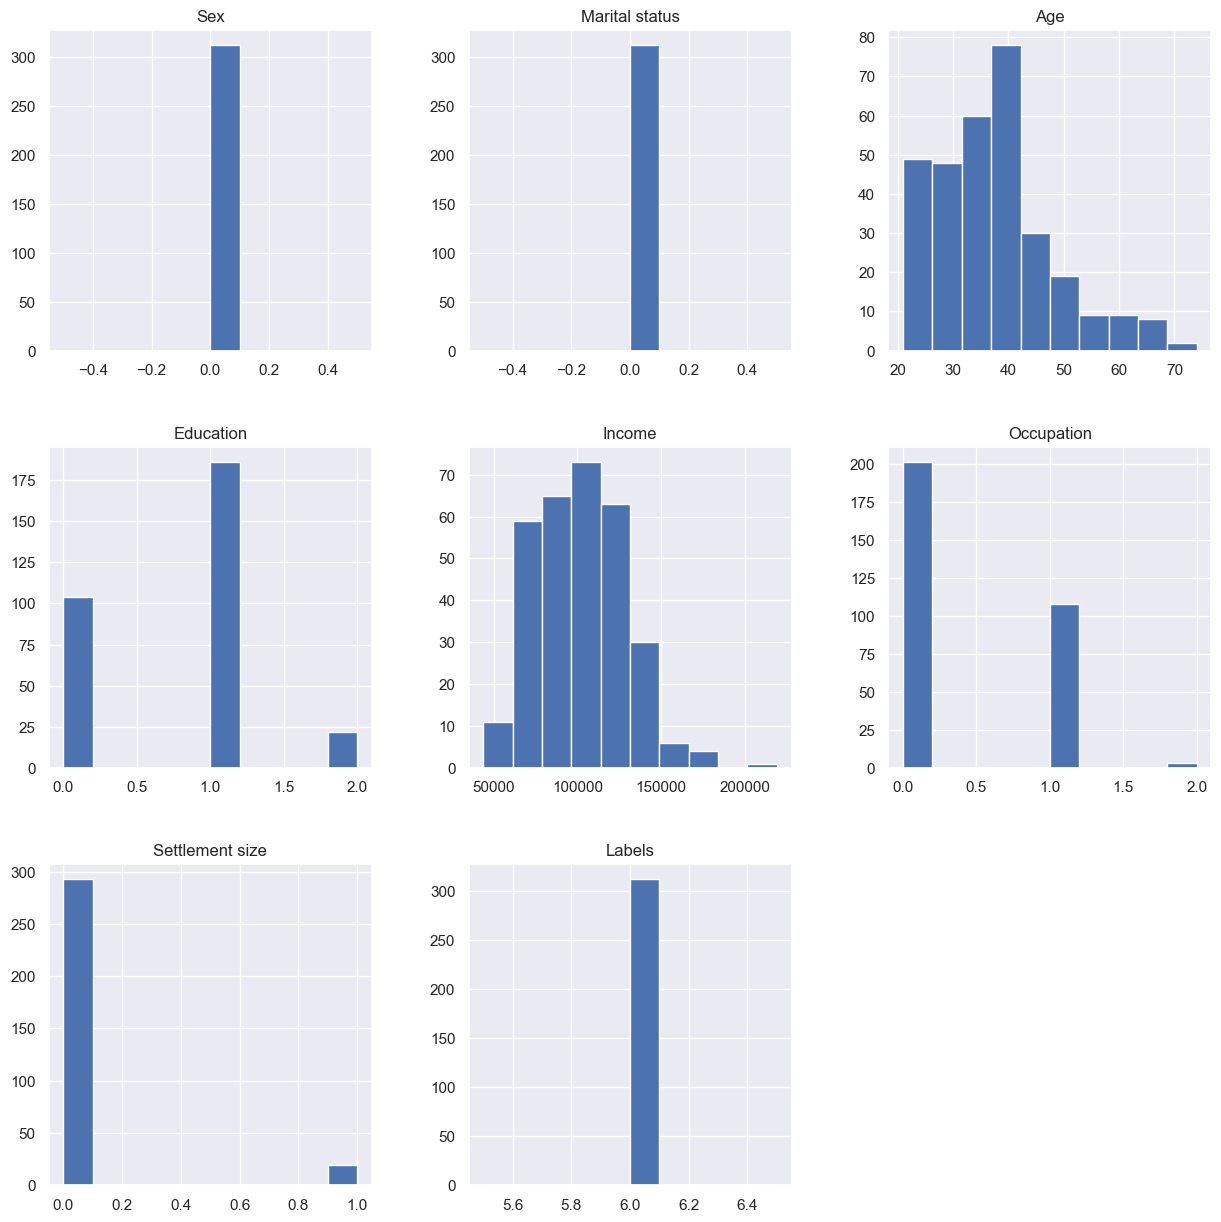

In [42]:
results_info[results_info['Labels'] == 6].hist(figsize=(15,15))

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [37]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [38]:
X_clusters = results_info.drop('Labels', axis=1)
y_clusters = results_info['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       517
           1       1.00      1.00      1.00       430
           2       1.00      1.00      1.00       257
           3       0.96      1.00      0.98       312
           4       1.00      0.99      1.00       306
           5       1.00      1.00      1.00       178

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Visualizing of the clustering tree

In [45]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus

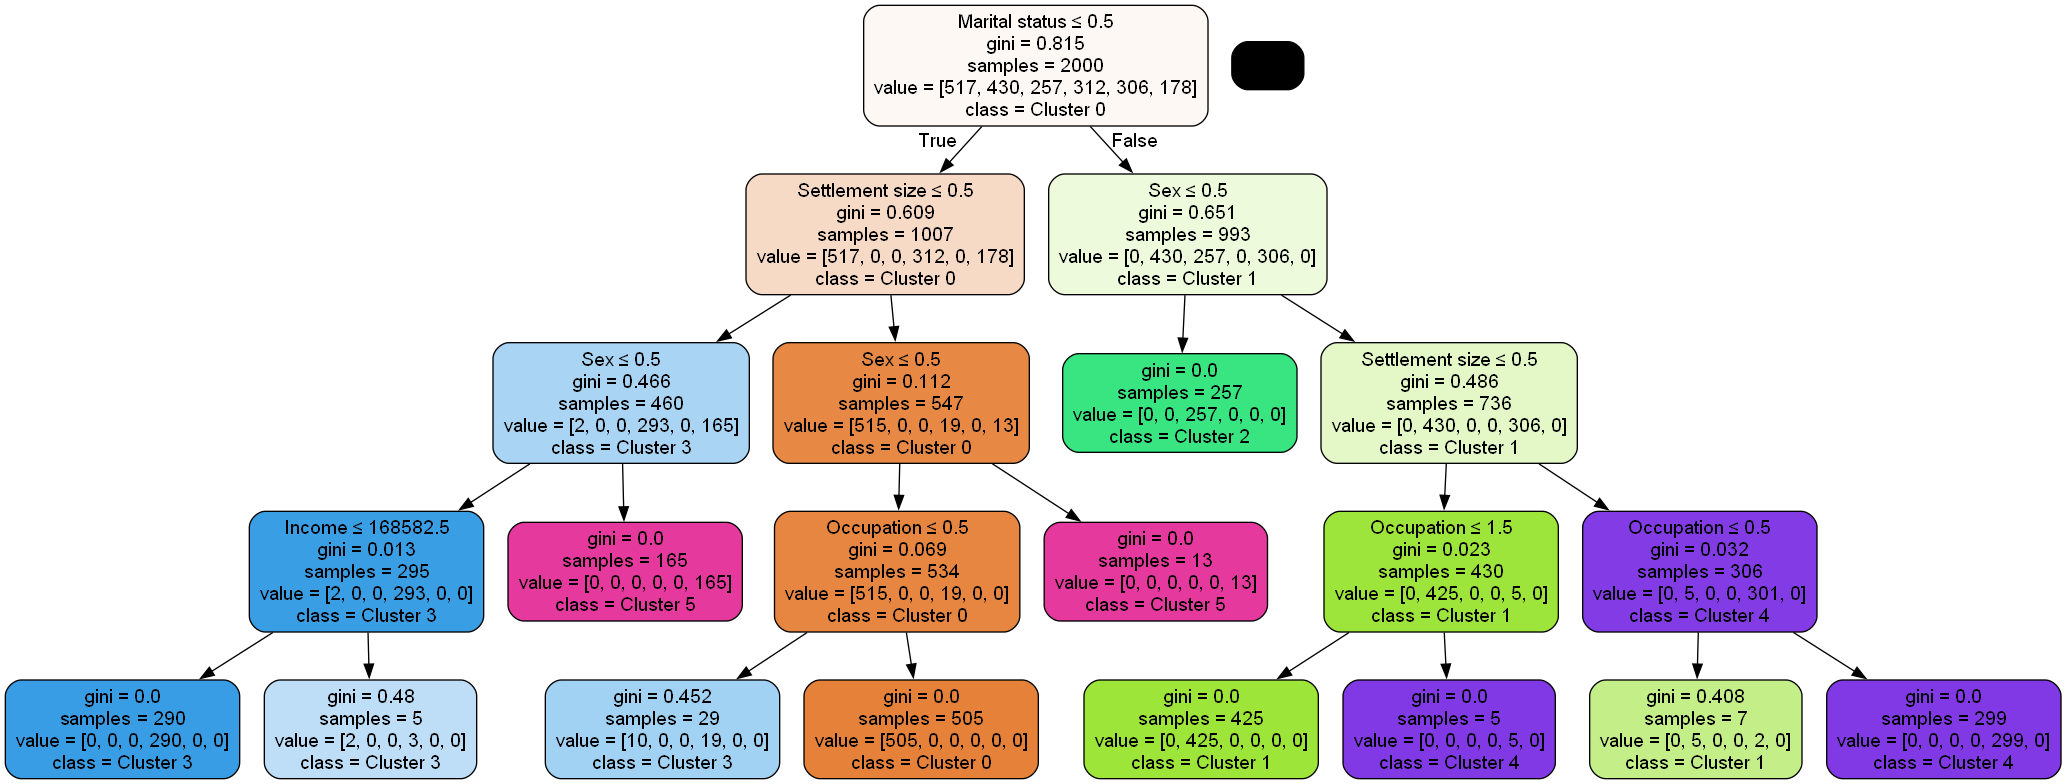

In [46]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names =results_info.columns[:7],
                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DecisionTree.png')
Image(graph.create_png())